# Section 2: IMDb Ratings EDA

In [304]:
# Import libraries
import pandas as pd
import numpy as np

# Episodes data
episodes_url = "https://drive.google.com/uc?export=download&id=1Q2s1TZAl1epx_-hi8yXWQv12UJGt_LYe"
episodes_data = pd.read_csv(episodes_url)

# Seasons data
seasons_url = "https://drive.google.com/uc?export=download&id=1M1cEpgPXD1PTLywN2JD7Dn8-QEWcUfWQ"
seasons_data = pd.read_csv(seasons_url)

# View first few rows
print(episodes_data.head())
print(seasons_data.head())

# Focus on US version only
if "version" in episodes_data.columns:
    episodes_data = episodes_data[episodes_data["version"] == "US"].copy()

if "version" in seasons_data.columns:
    seasons_data = seasons_data[seasons_data["version"] == "US"].copy()

episodes_data["air_date"] = pd.to_datetime(episodes_data["air_date"], errors="coerce")
print("air_date missing after parsing:", episodes_data["air_date"].isna().sum())

  version  season  episode_number_overall  episode               title  \
0      US       1                       1        1    And So It Begins   
1      US       1                       2        2     Of Wolf and Man   
2      US       1                       3        3  The Talons of Fear   
3      US       1                       4        4             Stalked   
4      US       1                       5        5       Winds of Hell   

     air_date  viewers                                              quote  \
0  2015-06-18    1.582  I went to the woods because I wished to live d...   
1  2015-06-25    1.697  If you live among wolves you have to act like ...   
2  2015-07-02    1.864  Extinction is the rule. Survival is the except...   
3  2015-07-09    2.082  Hunger, love, pain, fear are some of those inn...   
4  2015-07-16    2.082    The strong survive, but the courageous triumph.   

                author  imdb_rating  n_ratings  
0  Henry David Thoreau          7.5      13

In [305]:
# Episode and Season Dataset Shape
episodes_data.shape, seasons_data.shape

((98, 11), (9, 8))

In [306]:
# Columns for Episode Dataset
episodes_data.columns

Index(['version', 'season', 'episode_number_overall', 'episode', 'title',
       'air_date', 'viewers', 'quote', 'author', 'imdb_rating', 'n_ratings'],
      dtype='object')

In [307]:
# Missing count for each column in episode_data

key_cols = ["imdb_rating", "n_ratings", "viewers", "air_date", "title", "season", "episode"]
missing = episodes_data[key_cols].isna().sum().to_frame(name="missing_count")
missing["missing_pct"] = (missing["missing_count"] / len(episodes_data)).round(4)

display(missing)

,missing_count,missing_pct
imdb_rating,5,0.0510
n_ratings,5,0.0510
viewers,15,0.1531
air_date,0,0.0000
title,0,0.0000
season,0,0.0000
episode,0,0.0000


In [308]:
#Checking for duplicates

dup_mask = episodes_data.duplicated(subset=["season", "episode"], keep=False)
dups = episodes_data.loc[dup_mask, ["season", "episode", "title", "air_date", "imdb_rating"]]

print("Duplicate (season, episode) rows:", dups.shape[0])
if dups.shape[0] > 0:
    display(dups.sort_values(["season", "episode"]))

Duplicate (season, episode) rows: 0


In [309]:
# Checking for IMDb Ratings with missing values

episodes_r = episodes_data.dropna(subset=["imdb_rating"]).copy()
print("Rows with non-missing imdb_rating:", len(episodes_r), "out of", len(episodes_data))

Rows with non-missing imdb_rating: 93 out of 98


IMDb rating summary (non-missing):


,imdb_rating
count,93.000000
mean,7.821505
std,0.365302
min,6.900000
25%,7.600000
50%,7.800000
75%,8.100000
max,8.800000


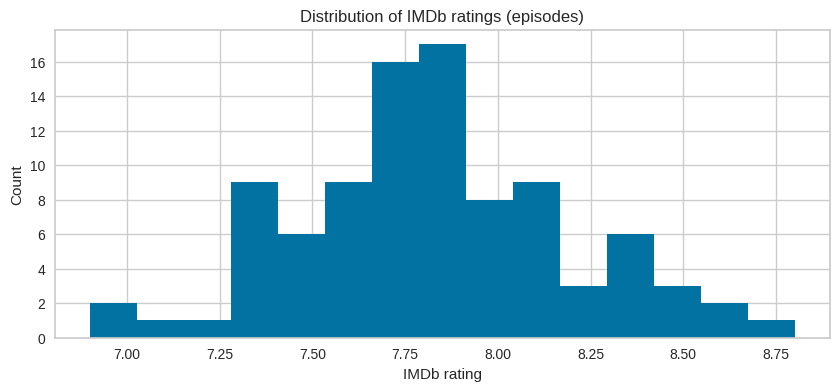

In [310]:
# Distribution of IMDb Ratings for Episodes

print("IMDb rating summary (non-missing):")
display(episodes_r["imdb_rating"].describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(episodes_r["imdb_rating"], bins=15)
plt.title("Distribution of IMDb ratings (episodes)")
plt.xlabel("IMDb rating")
plt.ylabel("Count")
plt.show()

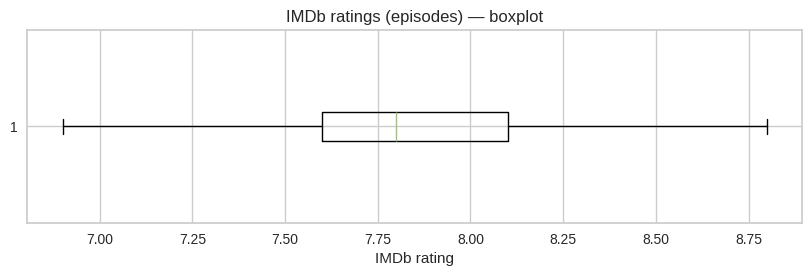

In [311]:
#IMDb Ratings for Episodes

plt.figure(figsize=(10, 2.5))
plt.boxplot(episodes_r["imdb_rating"], vert=False)
plt.title("IMDb ratings (episodes) — boxplot")
plt.xlabel("IMDb rating")
plt.show()

In [312]:
# Summary of Alone Seasons

season_summary = (
    episodes_r.groupby("season", dropna=False)
    .agg(
        n_episodes=("imdb_rating", "size"),
        mean_rating=("imdb_rating", "mean"),
        std_rating=("imdb_rating", "std"),
        min_rating=("imdb_rating", "min"),
        max_rating=("imdb_rating", "max"),
    )
    .reset_index()
    .sort_values("season")
)

display(season_summary)

,season,n_episodes,mean_rating,std_rating,min_rating,max_rating
0,1,11,7.672727,0.214900,7.3,8.2
1,2,13,7.592308,0.155250,7.3,7.8
2,3,10,7.820000,0.139841,7.6,8.1
3,4,10,7.300000,0.244949,6.9,7.6
4,5,10,8.000000,0.149071,7.8,8.3
5,6,11,8.018182,0.362817,7.6,8.8
6,7,11,8.336364,0.174773,8.1,8.6
7,8,11,7.781818,0.248267,7.3,8.1
8,9,6,7.933333,0.441210,7.5,8.6


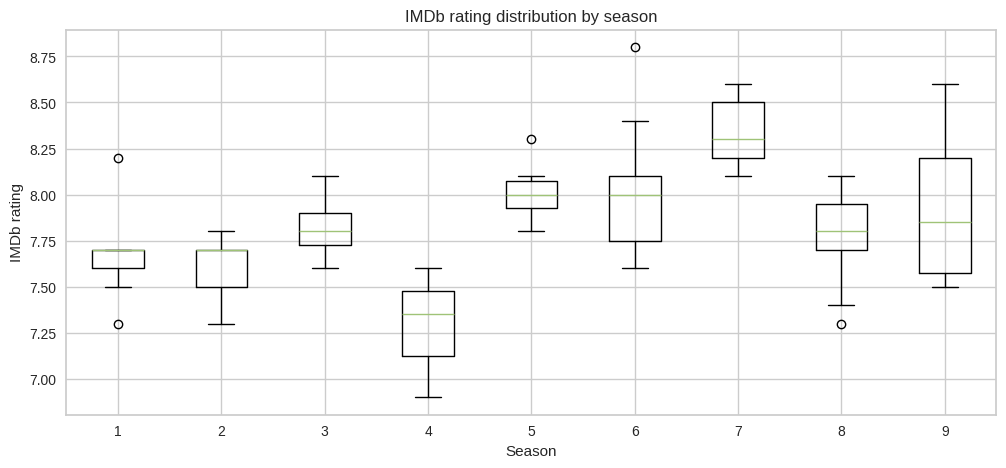

In [313]:
#IMDb rating distributionby season

seasons_sorted = season_summary["season"].tolist()
data_by_season = [episodes_r.loc[episodes_r["season"] == s, "imdb_rating"].values for s in seasons_sorted]

plt.figure(figsize=(12, 5))
plt.boxplot(data_by_season, tick_labels=seasons_sorted, showfliers=True)
plt.title("IMDb rating distribution by season")
plt.xlabel("Season")
plt.ylabel("IMDb rating")
plt.show()

In [314]:
# Top and Bottom 5 Episodes

cols_show = ["season", "episode", "episode_number_overall", "title", "air_date", "imdb_rating", "n_ratings"]

top_eps = episodes_r.sort_values("imdb_rating", ascending=False).head(5)[cols_show]
bottom_eps = episodes_r.sort_values("imdb_rating", ascending=True).head(5)[cols_show]

print("Top 5 rated episodes:")
display(top_eps)

print("Bottom 5 rated episodes:")
display(bottom_eps)

Top 5 rated episodes:


,season,episode,episode_number_overall,title,air_date,imdb_rating,n_ratings
64,6,11,66,Fire and Ice,2019-08-22,8.8,66.0
74,7,10,76,Pins and Needles,2020-08-13,8.6,68.0
97,9,11,100,"Fight, Flight or Freeze",2022-08-04,8.6,5.0
70,7,6,72,The Musk Ox,2020-07-16,8.5,72.0
73,7,9,75,The Wolves,2020-08-06,8.5,70.0


Bottom 5 rated episodes:


,season,episode,episode_number_overall,title,air_date,imdb_rating,n_ratings
35,4,2,36,Hell on Earth,2017-06-22,6.9,53.0
34,4,1,35,Divide and Conquer,2017-06-15,7.0,55.0
36,4,3,37,Margin of Error,2017-06-29,7.1,48.0
37,4,4,38,The Last Mile,2017-07-06,7.2,46.0
10,1,11,11,Triumph,2015-08-20,7.3,75.0


In [315]:
# .describe of imdb_rating
episodes_r["imdb_rating"].describe()

,imdb_rating
count,93.000000
mean,7.821505
std,0.365302
min,6.900000
25%,7.600000
50%,7.800000
75%,8.100000
max,8.800000


In [316]:
# Checking for episodes with ratings below 20:

episodes_r["n_ratings"].describe()

low_vote = episodes_r[episodes_r["n_ratings"] < 20][["season","episode","title","imdb_rating","n_ratings"]]
print("Episodes with n_ratings < 20:", len(low_vote))
display(low_vote.sort_values(["n_ratings","imdb_rating"]))

Episodes with n_ratings < 20: 1


,season,episode,title,imdb_rating,n_ratings
97,9,11,"Fight, Flight or Freeze",8.6,5.0


# Section 3: Unsupervised & Unstructured ML Methods

**Section 3A: Episode-Level Clustering (IMDb Rating Patterns)**

In [317]:
# 3A.1 Build episode-level feature dataset (df)
df = episodes_r[["imdb_rating", "n_ratings"]].copy()
df

,imdb_rating,n_ratings
0,7.5,135.0
1,7.7,110.0
2,7.7,104.0
3,7.7,104.0
4,7.6,99.0
...,...,...
88,7.5,31.0
89,7.5,32.0
90,8.3,31.0
91,7.8,26.0


In [318]:
# 3A.2 Standardize episode-level features (df_normalized)
from sklearn.preprocessing import StandardScaler
import pandas as pd

sc = StandardScaler()

df_normalized = pd.DataFrame(
    sc.fit_transform(df),
    columns=df.columns
)

df_normalized

,imdb_rating,n_ratings
0,-0.884879,3.608594
1,-0.334419,2.356918
2,-0.334419,2.056516
3,-0.334419,2.056516
4,-0.609649,1.806181
...,...,...
88,-0.884879,-1.598376
89,-0.884879,-1.548309
90,1.316960,-1.598376
91,-0.059189,-1.848711


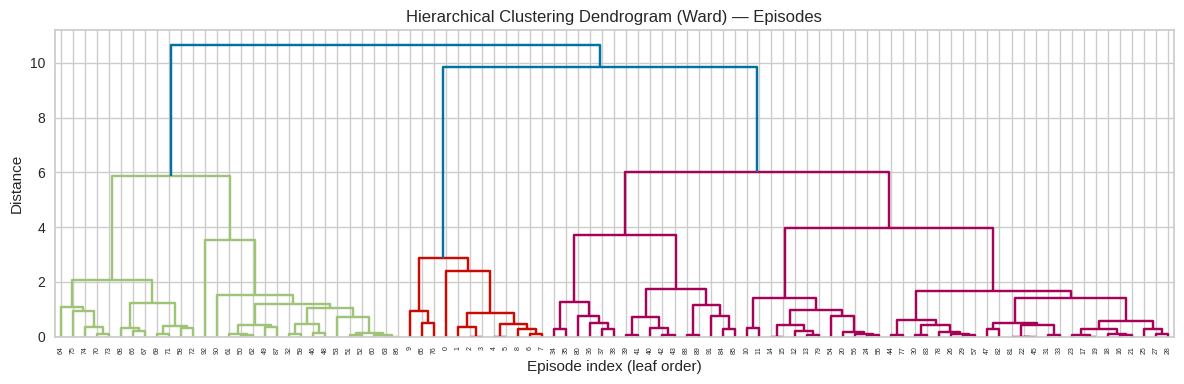

In [319]:
# 3A.3 Hierarchical clustering (Ward) + dendrogram (episodes)
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

Z = linkage(df_normalized, "ward")

plt.figure(figsize=(12, 4))
dendro_info = dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Ward) — Episodes")
plt.xlabel("Episode index (leaf order)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [320]:
# 3A.4 Assign hierarchical cluster labels (episodes)
n_clusters_hier = 3
df["cluster_labels_hier"] = fcluster(Z, n_clusters_hier, criterion="maxclust").astype(str)

df["cluster_labels_hier"].value_counts()

,count
cluster_labels_hier,
3,52
1,29
2,12


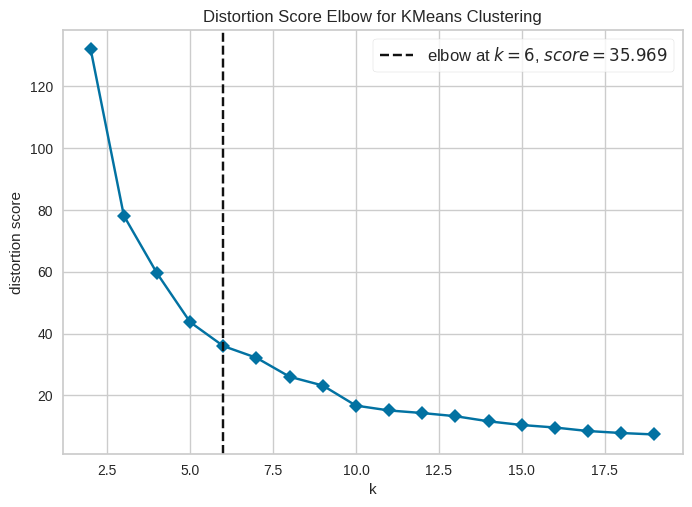

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [321]:
# 3A.5 KMeans elbow plot (Yellowbrick)
!pip -q install yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 20), metric="distortion", timings=False, random_state=42
)

visualizer.fit(df_normalized)
visualizer.show()

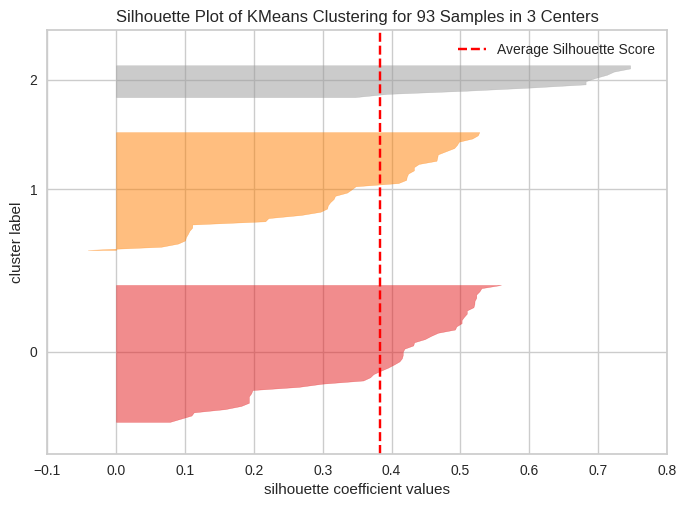

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 93 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [322]:
# 3A.6 KMeans silhouette plot (Yellowbrick)
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

n_clusters_kmeans = 3

kmeans_model = KMeans(n_clusters=n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(df_normalized)
visualizer.show()

In [323]:
# 3A.7 Fit final KMeans + store labels in df_normalized
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)

df_normalized["cluster_labels_km"] = kmeans.fit_predict(df_normalized).astype(str)

print(df_normalized["cluster_labels_km"].value_counts())

cluster_labels_km
0    44
1    38
2    11
Name: count, dtype: int64


In [324]:
# 3A.8 Merge KMeans labels back to episode metadata (df_ep_labeled)
df_ep_labeled = episodes_r.copy()
df_ep_labeled["cluster_labels_km"] = df_normalized["cluster_labels_km"].values

cols_show = ["season", "episode", "title", "imdb_rating", "n_ratings", "cluster_labels_km"]
df_ep_labeled[cols_show].head()

,season,episode,title,imdb_rating,n_ratings,cluster_labels_km
0,1,1,And So It Begins,7.5,135.0,2
1,1,2,Of Wolf and Man,7.7,110.0,2
2,1,3,The Talons of Fear,7.7,104.0,2
3,1,4,Stalked,7.7,104.0,2
4,1,5,Winds of Hell,7.6,99.0,2


In [325]:
# 3A.9 Cluster summary table (KMeans interpretation)
cluster_summary_ep = (
    df_ep_labeled.groupby("cluster_labels_km")
    .agg(
        n=("imdb_rating", "size"),
        mean_rating=("imdb_rating", "mean"),
        std_rating=("imdb_rating", "std"),
        mean_votes=("n_ratings", "mean"),
        min_rating=("imdb_rating", "min"),
        max_rating=("imdb_rating", "max"),
    )
    .sort_index()
)

cluster_summary_ep

,n,mean_rating,std_rating,mean_votes,min_rating,max_rating
cluster_labels_km,,,,,,
0,44,7.552273,0.227717,57.068182,6.9,7.8
1,38,8.157895,0.237818,58.078947,7.9,8.8
2,11,7.736364,0.196330,103.090909,7.5,8.2


In [326]:
# 3A.10 Representative episodes per cluster (top/bottom by rating)
cols = ["season", "episode", "title", "imdb_rating", "n_ratings", "cluster_labels_km"]

for c in sorted(df_ep_labeled["cluster_labels_km"].unique()):
    print(f"\nCluster {c} — top 5 by rating")
    display(
        df_ep_labeled[df_ep_labeled["cluster_labels_km"] == c]
        .sort_values("imdb_rating", ascending=False)[cols]
        .head(5)
    )

    print(f"Cluster {c} — bottom 5 by rating")
    display(
        df_ep_labeled[df_ep_labeled["cluster_labels_km"] == c]
        .sort_values("imdb_rating", ascending=True)[cols]
        .head(5)
    )


Cluster 0 — top 5 by rating


,season,episode,title,imdb_rating,n_ratings,cluster_labels_km
27,3,4,Outfoxed,7.8,63.0,0
28,3,5,The Lone Wolf,7.8,61.0,0
25,3,2,First Blood,7.8,67.0,0
91,9,5,The Land Giveth…,7.8,26.0,0
47,5,4,Mongolia's Wrath,7.8,50.0,0


Cluster 0 — bottom 5 by rating


,season,episode,title,imdb_rating,n_ratings,cluster_labels_km
35,4,2,Hell on Earth,6.9,53.0,0
34,4,1,Divide and Conquer,7.0,55.0,0
36,4,3,Margin of Error,7.1,48.0,0
37,4,4,The Last Mile,7.2,46.0,0
10,1,11,Triumph,7.3,75.0,0



Cluster 1 — top 5 by rating


,season,episode,title,imdb_rating,n_ratings,cluster_labels_km
64,6,11,Fire and Ice,8.8,66.0,1
74,7,10,Pins and Needles,8.6,68.0,1
97,9,11,"Fight, Flight or Freeze",8.6,5.0,1
73,7,9,The Wolves,8.5,70.0,1
75,7,11,Over the Edge,8.5,85.0,1


Cluster 1 — bottom 5 by rating


,season,episode,title,imdb_rating,n_ratings,cluster_labels_km
26,3,3,Eternal Darkness,7.9,63.0,1
29,3,6,Along Came a Spider,7.9,62.0,1
30,3,7,Hungry Beasts,7.9,58.0,1
49,5,6,Of Mice And Men,7.9,48.0,1
57,6,4,The Moose,7.9,61.0,1



Cluster 2 — top 5 by rating


,season,episode,title,imdb_rating,n_ratings,cluster_labels_km
9,1,10,Brokedown Palace,8.2,102.0,2
76,8,1,The Hunted,8.0,92.0,2
1,1,2,Of Wolf and Man,7.7,110.0,2
8,1,9,The Freeze,7.7,93.0,2
2,1,3,The Talons of Fear,7.7,104.0,2


Cluster 2 — bottom 5 by rating


,season,episode,title,imdb_rating,n_ratings,cluster_labels_km
0,1,1,And So It Begins,7.5,135.0,2
4,1,5,Winds of Hell,7.6,99.0,2
5,1,6,Rain of Terror,7.6,99.0,2
1,1,2,Of Wolf and Man,7.7,110.0,2
3,1,4,Stalked,7.7,104.0,2


In [327]:
# 3A.11 Cluster distribution by season (counts)
import pandas as pd

season_cluster_ct = pd.crosstab(df_ep_labeled["season"], df_ep_labeled["cluster_labels_km"])
display(season_cluster_ct)

cluster_labels_km,0,1,2
season,,,
1,1,0,10
2,13,0,0
3,6,4,0
4,10,0,0
5,2,8,0
6,3,8,0
7,0,11,0
8,6,4,1
9,3,3,0


In [328]:
# 3A.12 Cluster distribution by season (row-normalized percentages)
season_cluster_pct = pd.crosstab(
    df_ep_labeled["season"],
    df_ep_labeled["cluster_labels_km"],
    normalize="index"
).round(3)

display(season_cluster_pct)

cluster_labels_km,0,1,2
season,,,
1,0.091,0.000,0.909
2,1.000,0.000,0.000
3,0.600,0.400,0.000
4,1.000,0.000,0.000
5,0.200,0.800,0.000
6,0.273,0.727,0.000
7,0.000,1.000,0.000
8,0.545,0.364,0.091
9,0.500,0.500,0.000


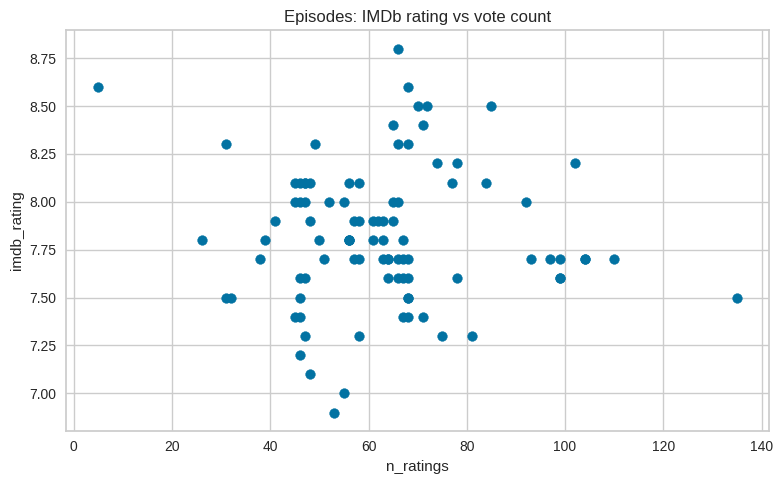

In [329]:
# 3A.13 Diagnostic scatter: rating vs vote count
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df_ep_labeled["n_ratings"], df_ep_labeled["imdb_rating"])
plt.xlabel("n_ratings")
plt.ylabel("imdb_rating")
plt.title("Episodes: IMDb rating vs vote count")
plt.tight_layout()
plt.show()

In [330]:
# 3A.14 Expanded episode feature set for experimentation (episodes_seg)
import numpy as np
import pandas as pd

num_cols = [c for c in ["season", "episode", "viewers", "imdb_rating", "n_ratings"] if c in episodes_data.columns]
episodes_seg = episodes_data[episodes_data["version"] == "US"][num_cols].copy()

for c in num_cols:
    episodes_seg[c] = episodes_seg[c].fillna(episodes_seg[c].median())

display(episodes_seg.head())
episodes_seg.isna().sum()

,season,episode,viewers,imdb_rating,n_ratings
0,1,1,1.582,7.5,135.0
1,1,2,1.697,7.7,110.0
2,1,3,1.864,7.7,104.0
3,1,4,2.082,7.7,104.0
4,1,5,2.082,7.6,99.0


,0
season,0
episode,0
viewers,0
imdb_rating,0
n_ratings,0



Hierarchical (Ward) — k=3 cluster sizes:
cluster_hier_exp
1    55
3    33
2    10
Name: count, dtype: int64


,n,mean_rating,mean_viewers,mean_votes,min_rating,max_rating
cluster_hier_exp,,,,,,
1,55,7.990909,1.378364,58.054545,7.3,8.8
2,10,7.710000,1.882900,104.200000,7.5,8.2
3,33,7.569697,1.660000,58.545455,6.9,8.1


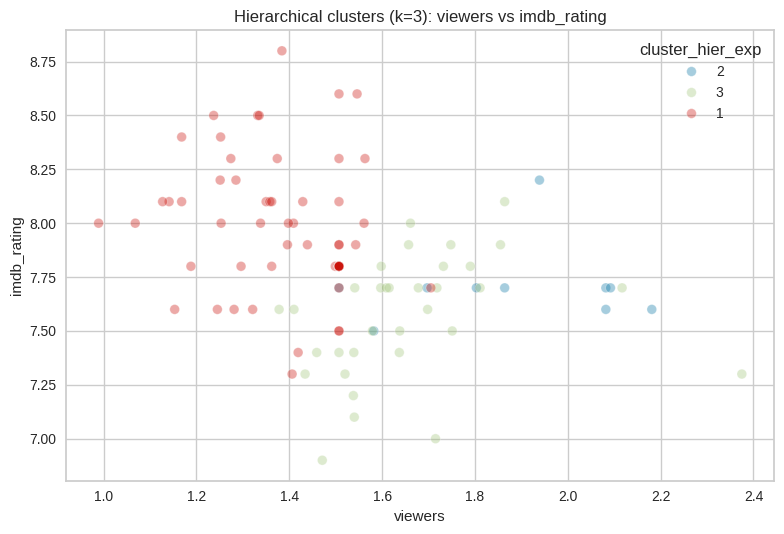


Hierarchical (Ward) — k=4 cluster sizes:
cluster_hier_exp
2    34
4    33
1    21
3    10
Name: count, dtype: int64


,n,mean_rating,mean_viewers,mean_votes,min_rating,max_rating
cluster_hier_exp,,,,,,
2,34,8.079412,1.401176,52.470588,7.5,8.8
1,21,7.847619,1.341429,67.095238,7.3,8.2
3,10,7.710000,1.882900,104.200000,7.5,8.2
4,33,7.569697,1.660000,58.545455,6.9,8.1


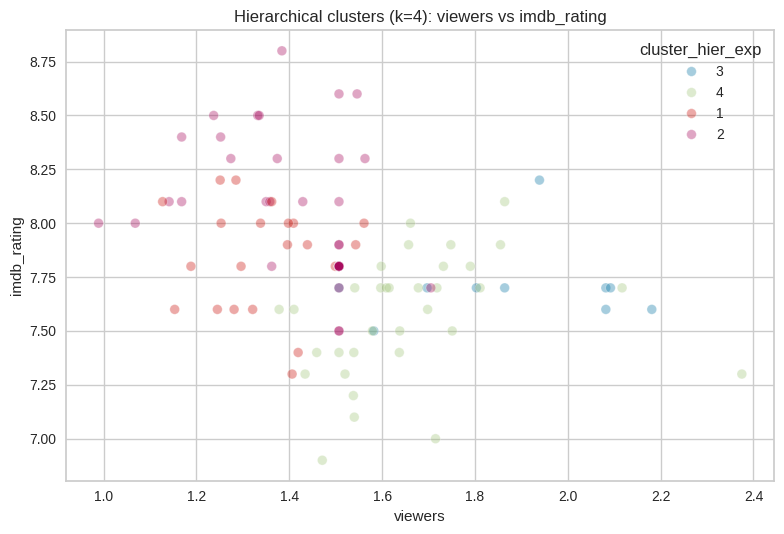


Hierarchical (Ward) — k=5 cluster sizes:
cluster_hier_exp
5    33
1    21
2    18
3    16
4    10
Name: count, dtype: int64


,n,mean_rating,mean_viewers,mean_votes,min_rating,max_rating
cluster_hier_exp,,,,,,
2,18,8.316667,1.304167,56.666667,8.0,8.8
1,21,7.847619,1.341429,67.095238,7.3,8.2
3,16,7.812500,1.510312,47.750000,7.5,8.3
4,10,7.710000,1.882900,104.200000,7.5,8.2
5,33,7.569697,1.660000,58.545455,6.9,8.1


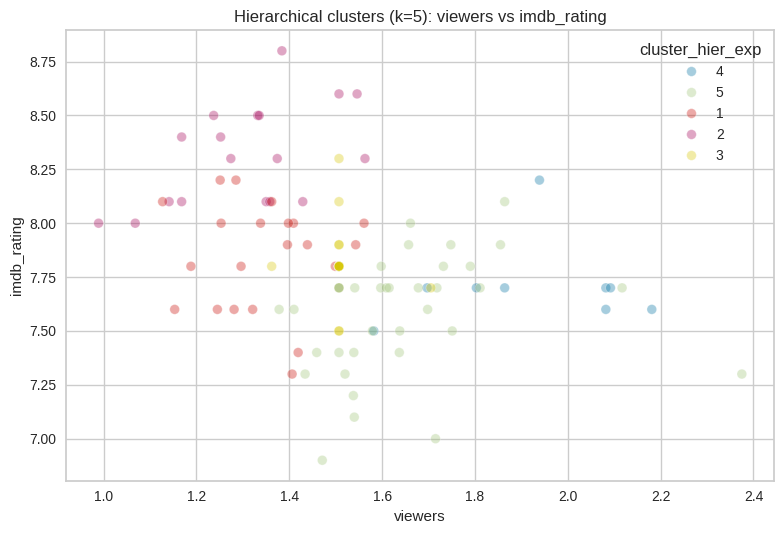

In [331]:
# 3A.15 Hierarchical clustering experiments (Ward) on normalized expanded features
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sc = StandardScaler()
episodes_seg_norm = pd.DataFrame(sc.fit_transform(episodes_seg), columns=episodes_seg.columns)

Z_exp = linkage(episodes_seg_norm, "ward")

for k in [3, 4, 5]:
    labels = fcluster(Z_exp, k, criterion="maxclust").astype(str)
    tmp = episodes_seg.copy()
    tmp["cluster_hier_exp"] = labels

    print(f"\nHierarchical (Ward) — k={k} cluster sizes:")
    print(tmp["cluster_hier_exp"].value_counts())

    summary = (
        tmp.groupby("cluster_hier_exp")
        .agg(
            n=("imdb_rating", "size"),
            mean_rating=("imdb_rating", "mean"),
            mean_viewers=("viewers", "mean"),
            mean_votes=("n_ratings", "mean"),
            min_rating=("imdb_rating", "min"),
            max_rating=("imdb_rating", "max"),
        )
        .sort_values(["mean_rating", "mean_viewers"], ascending=False)
    )
    display(summary)

    sns.scatterplot(data=tmp, x="viewers", y="imdb_rating", hue="cluster_hier_exp", alpha=0.35)
    plt.title(f"Hierarchical clusters (k={k}): viewers vs imdb_rating")
    plt.tight_layout()
    plt.show()

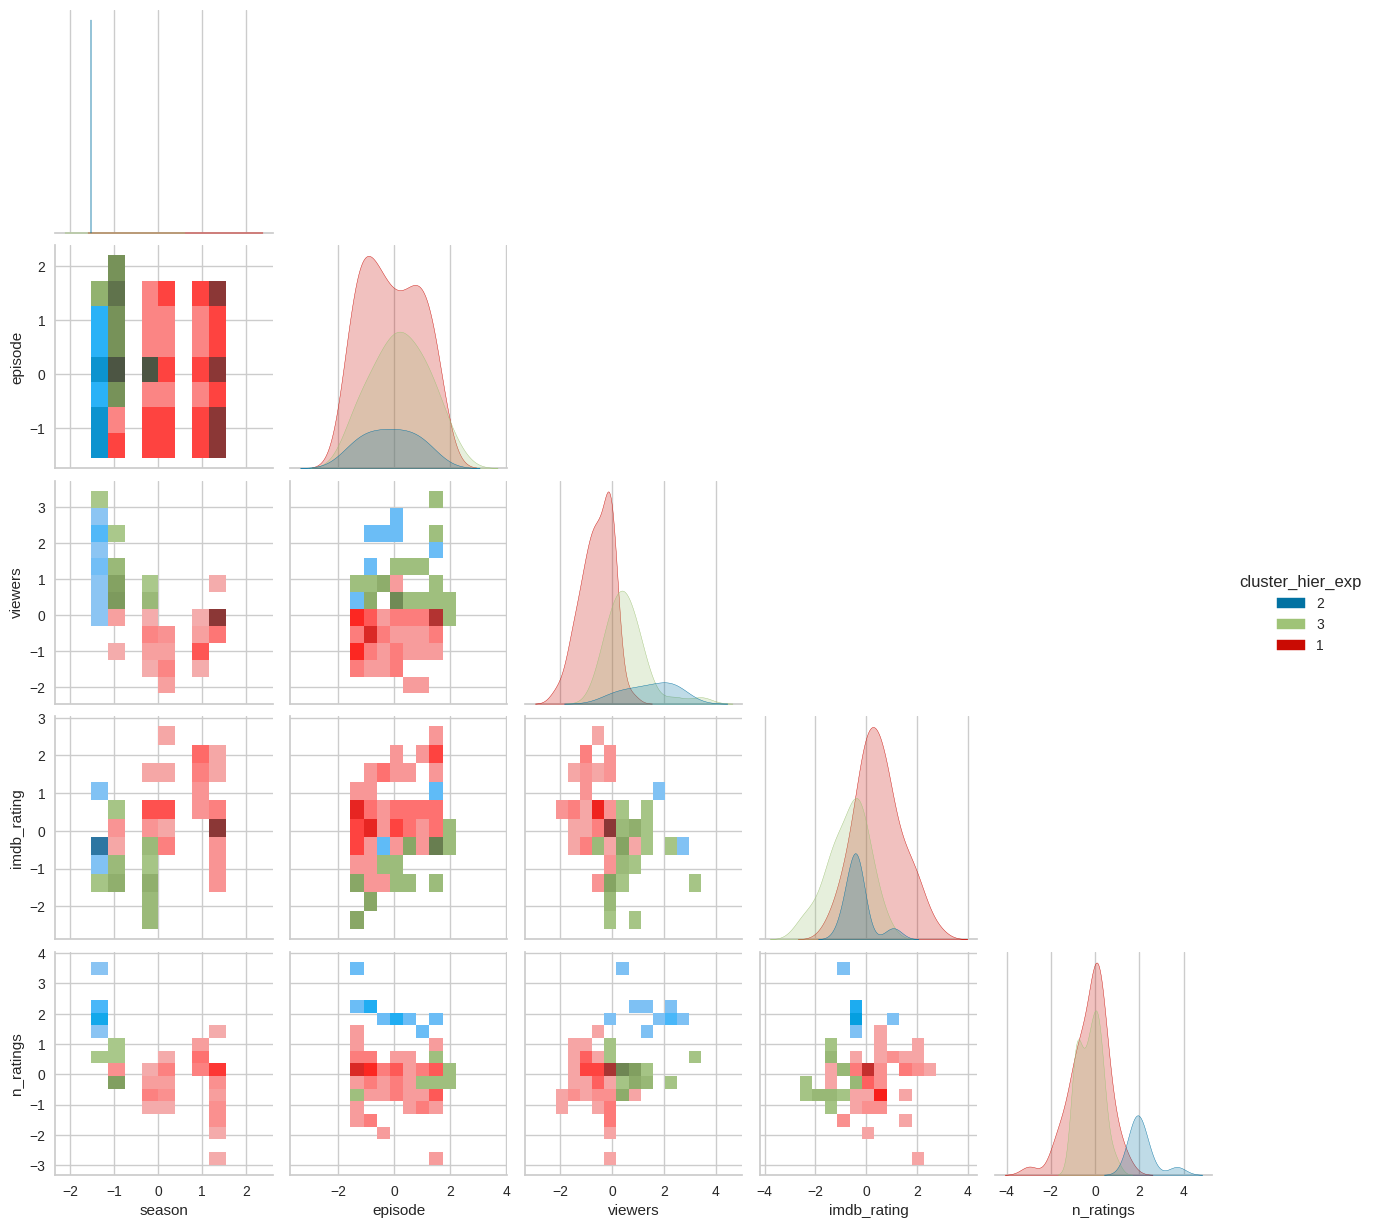

In [332]:
# 3A.16 Pairplot for deeper interpretation
import seaborn as sns
import matplotlib.pyplot as plt

k = 3
labels = fcluster(Z_exp, k, criterion="maxclust").astype(str)

tmp_norm = episodes_seg_norm.copy()
tmp_norm["cluster_hier_exp"] = labels

sns.pairplot(tmp_norm, hue="cluster_hier_exp", kind="hist", diag_kind="kde", corner=True)
plt.show()

**Section 3B: Season-Level Clustering (Season Rating Profiles)**

In [333]:
# 3B.1 Create season-level summary features (season_summary)
season_summary = (
    episodes_r.groupby("season")
    .agg(
        n_episodes=("imdb_rating", "size"),
        mean_rating=("imdb_rating", "mean"),
        std_rating=("imdb_rating", "std"),
        min_rating=("imdb_rating", "min"),
        max_rating=("imdb_rating", "max"),
        mean_votes=("n_ratings", "mean"),
    )
    .reset_index()
    .sort_values("season")
)

season_summary

,season,n_episodes,mean_rating,std_rating,min_rating,max_rating,mean_votes
0,1,11,7.672727,0.214900,7.3,8.2,101.545455
1,2,13,7.592308,0.155250,7.3,7.8,66.769231
2,3,10,7.820000,0.139841,7.6,8.1,61.200000
3,4,10,7.300000,0.244949,6.9,7.6,47.900000
4,5,10,8.000000,0.149071,7.8,8.3,51.400000
5,6,11,8.018182,0.362817,7.6,8.8,58.909091
6,7,11,8.336364,0.174773,8.1,8.6,73.909091
7,8,11,7.781818,0.248267,7.3,8.1,57.727273
8,9,6,7.933333,0.441210,7.5,8.6,27.666667


In [334]:
# 3B.2 Build season-level feature dataset (df_season)
df_season = season_summary[["mean_rating", "std_rating", "min_rating", "max_rating", "n_episodes", "mean_votes"]].copy()
df_season

,mean_rating,std_rating,min_rating,max_rating,n_episodes,mean_votes
0,7.672727,0.214900,7.3,8.2,11,101.545455
1,7.592308,0.155250,7.3,7.8,13,66.769231
2,7.820000,0.139841,7.6,8.1,10,61.200000
3,7.300000,0.244949,6.9,7.6,10,47.900000
4,8.000000,0.149071,7.8,8.3,10,51.400000
5,8.018182,0.362817,7.6,8.8,11,58.909091
6,8.336364,0.174773,8.1,8.6,11,73.909091
7,7.781818,0.248267,7.3,8.1,11,57.727273
8,7.933333,0.441210,7.5,8.6,6,27.666667


In [335]:
# 3B.3 Standardize season-level features (season_norm)
from sklearn.preprocessing import StandardScaler
import pandas as pd

sc_season = StandardScaler()
season_norm = pd.DataFrame(sc_season.fit_transform(df_season), columns=df_season.columns)

season_norm

,mean_rating,std_rating,min_rating,max_rating,n_episodes,mean_votes
0,-0.559480,-0.223983,-0.581728,-0.090536,0.377964,2.150669
1,-0.848683,-0.834418,-0.581728,-1.176965,1.511858,0.315941
2,-0.029861,-0.992107,0.342193,-0.362143,-0.188982,0.022119
3,-1.899872,0.083533,-1.813623,-1.720179,-0.188982,-0.679564
4,0.617451,-0.897650,0.958140,0.181071,-0.188982,-0.494911
5,0.682836,1.289760,0.342193,1.539108,0.377964,-0.098746
6,1.827073,-0.634630,1.882061,0.995893,0.377964,0.692626
7,-0.167170,0.117486,-0.581728,-0.362143,0.377964,-0.161096
8,0.377706,2.092011,0.034219,0.995893,-2.456769,-1.747037


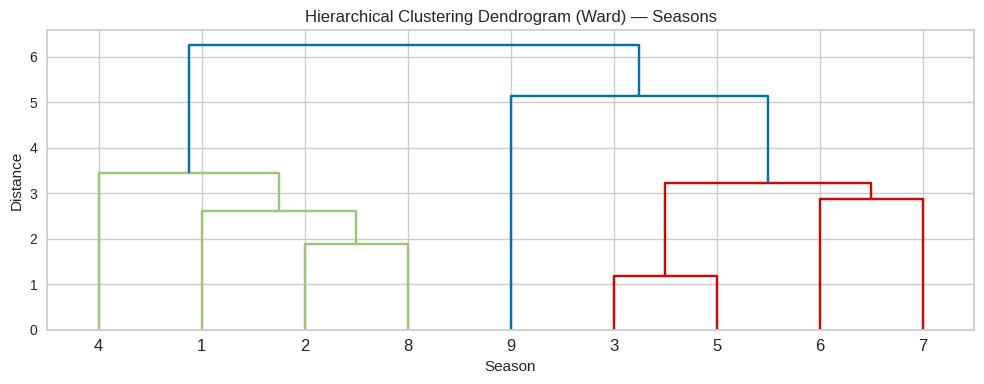

In [336]:
# 3B.4 Hierarchical clustering (Ward) + dendrogram (seasons)
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

Z_season = linkage(season_norm, "ward")

plt.figure(figsize=(10, 4))
dendro_info = dendrogram(
    Z_season,
    labels=season_summary["season"].astype(str).tolist()
)
plt.title("Hierarchical Clustering Dendrogram (Ward) — Seasons")
plt.xlabel("Season")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [337]:
# 3B.5 Assign season cluster labels + attach to season_summary
n_clusters_season = 3
season_summary["cluster_labels_season_hier"] = fcluster(
    Z_season, n_clusters_season, criterion="maxclust"
).astype(str)

season_summary[["season", "cluster_labels_season_hier", "mean_rating", "std_rating", "min_rating", "max_rating", "n_episodes", "mean_votes"]]

,season,cluster_labels_season_hier,mean_rating,std_rating,min_rating,max_rating,n_episodes,mean_votes
0,1,1,7.672727,0.214900,7.3,8.2,11,101.545455
1,2,1,7.592308,0.155250,7.3,7.8,13,66.769231
2,3,2,7.820000,0.139841,7.6,8.1,10,61.200000
3,4,1,7.300000,0.244949,6.9,7.6,10,47.900000
4,5,2,8.000000,0.149071,7.8,8.3,10,51.400000
5,6,2,8.018182,0.362817,7.6,8.8,11,58.909091
6,7,2,8.336364,0.174773,8.1,8.6,11,73.909091
7,8,1,7.781818,0.248267,7.3,8.1,11,57.727273
8,9,3,7.933333,0.441210,7.5,8.6,6,27.666667
